# TSFRESH Human Activity Recognition Example
This example show shows how to use [tsfresh](https://tsfresh.readthedocs.io/) to exctract useful features from multiple timeseries and use them to improve classification performance.

In [12]:
%matplotlib inline
import matplotlib.pylab as plt
from tsfresh.examples.har_dataset import download_har_dataset, load_har_dataset, load_har_classes
import seaborn as sns
from tsfresh import extract_features, extract_relevant_features, select_features
from tsfresh.utilities.dataframe_functions import impute
from tsfresh.feature_extraction import ComprehensiveFCParameters, MinimalFCParameters
from sklearn.tree import DecisionTreeClassifier
from sklearn.cross_validation import train_test_split
from sklearn.metrics import classification_report
import pandas as pd
import numpy as np

import logging

In [3]:
# We set the logger to Error level
# This is not recommend for normal use as you can oversee important Warning messages
logging.basicConfig(level=logging.ERROR)

## Load and visualize data
The dataset consists of timeseries for 7352 accelerometer readings. Each reading represents an accelerometer reading for 2.56 sec at 50hz (for a total of 128 samples per reading). Furthermore, each reading corresponds one of six activities (walking, walking upstairs, walking downstairs, sitting, standing and laying)

For more information, or to fetch dataset, go to https://archive.ics.uci.edu/ml/datasets/Human+Activity+Recognition+Using+Smartphones

In [4]:
# fetch dataset from uci
download_har_dataset()

In [5]:
df = load_har_dataset()
y = load_har_classes()

# binary classification
two_classes = (y==6) | (y==1)
df = df[two_classes]
y = y[two_classes]
y[y>1] = 0
df = df.reset_index(drop=True)

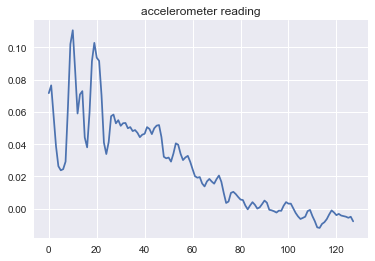

In [6]:
plt.title('accelerometer reading')
plt.plot(df.iloc[0,:])
plt.show()

## Extract Features

In [7]:
extraction_settings = ComprehensiveFCParameters()

In [8]:
# transpose since tsfresh reads times series data column-wise, not row-wise
df_t = df.copy().transpose()
df_t.shape

(128, 2633)

In [9]:
# rearrange sensor readings column-wise, not row-wise
N = df_t.shape[1]
master_df = pd.DataFrame(df_t[51])#, columns=['measurement', 'example_id'])
# master_df['label'] = y
master_df['id'] = 0

# grab first 500 readings to save time
for i in range(1, N):
    temp_df = pd.DataFrame(df_t[i])
    temp_df['id'] = i
    master_df = pd.DataFrame(np.vstack([master_df, temp_df]), columns=['measurement', 'example_id'])
master_df.example_id = master_df.example_id.astype(np.int)

In [304]:
_df.reset_index(drop=True)

,index,label
0,51,0
1,52,0
2,53,0
3,54,0
4,55,0
5,56,0
6,57,0
7,58,0
8,59,0
9,60,0


In [310]:
master_df.merge(_df, on='example_id')

,measurement,example_id,label
0,-0.247538,0,0
1,-0.467988,0,0
2,-0.466799,0,0
3,-0.176076,0,0
4,-0.042582,0,0
5,0.095253,0,0
6,-0.040238,0,0
7,-0.202516,0,0
8,-0.109824,0,0
9,-0.174255,0,0


(2633,)

In [283]:
master_df.shape

(2633,)

In [337]:
from tsfresh.transformers import FeatureAugmenter
augmenter = FeatureAugmenter()
augmenter.set_timeseries_container(master_df)
augmenter.transform(master_df)

ValueError: cannot label index with a null key

In [312]:
y

51      0
52      0
53      0
54      0
55      0
56      0
57      0
58      0
59      0
60      0
61      0
62      0
63      0
64      0
65      0
66      0
67      0
68      0
69      0
70      0
71      0
72      0
73      0
74      0
75      0
76      0
77      0
78      1
79      1
80      1
       ..
7264    1
7265    1
7266    1
7267    1
7268    1
7269    1
7270    1
7271    1
7272    1
7273    1
7274    1
7275    1
7276    1
7277    1
7278    1
7279    1
7280    1
7281    1
7282    1
7283    1
7284    1
7285    1
7286    1
7287    1
7288    1
7289    1
7290    1
7291    1
7292    1
7293    1
Name: 0, dtype: int64

In [340]:
%time X = extract_features(master_df, column_id='example_id', impute_function=impute, default_fc_parameters=extraction_settings);

Feature Extraction:   0%|          | 0/2633 [00:00<?, ?it/s]Process PoolWorker-7:
Process PoolWorker-8:
Process PoolWorker-6:
Process PoolWorker-5:
Traceback (most recent call last):
Traceback (most recent call last):
Traceback (most recent call last):
Traceback (most recent call last):
  File "/Users/crawles/anaconda/lib/python2.7/multiprocessing/process.py", line 258, in _bootstrap
  File "/Users/crawles/anaconda/lib/python2.7/multiprocessing/process.py", line 258, in _bootstrap
  File "/Users/crawles/anaconda/lib/python2.7/multiprocessing/process.py", line 258, in _bootstrap
  File "/Users/crawles/anaconda/lib/python2.7/multiprocessing/process.py", line 258, in _bootstrap
    self.run()
    self.run()
    self.run()
  File "/Users/crawles/anaconda/lib/python2.7/multiprocessing/process.py", line 114, in run
  File "/Users/crawles/anaconda/lib/python2.7/multiprocessing/process.py", line 114, in run
    self.run()
  File "/Users/crawles/anaconda/lib/python2.7/multiprocessing/process.py

KeyboardInterrupt: 

Process PoolWorker-16:
Process PoolWorker-15:
Process PoolWorker-14:
Process PoolWorker-13:
Traceback (most recent call last):
Traceback (most recent call last):
Traceback (most recent call last):
  File "/Users/crawles/anaconda/lib/python2.7/multiprocessing/process.py", line 258, in _bootstrap
  File "/Users/crawles/anaconda/lib/python2.7/multiprocessing/process.py", line 258, in _bootstrap
  File "/Users/crawles/anaconda/lib/python2.7/multiprocessing/process.py", line 258, in _bootstrap
Traceback (most recent call last):
  File "/Users/crawles/anaconda/lib/python2.7/multiprocessing/process.py", line 258, in _bootstrap
    self.run()
    self.run()
    self.run()
  File "/Users/crawles/anaconda/lib/python2.7/multiprocessing/process.py", line 114, in run
  File "/Users/crawles/anaconda/lib/python2.7/multiprocessing/process.py", line 114, in run
    self.run()
  File "/Users/crawles/anaconda/lib/python2.7/multiprocessing/process.py", line 114, in run
    self._target(*self._args, **self

In [84]:
# in total we have transformed the sensor data into 222 features
y.shape

(2633,)

## Train and evaluate classifier

In [98]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2)

## Try Random Forest

In [268]:
from sklearn.ensemble import RandomForestClassifier
cl = RandomForestClassifier(n_estimators=100, n_jobs=-1)
cl.fit(X_train, y_train)
roc_auc_score(y_test, cl.predict_proba(X_test)[:,1])

             precision    recall  f1-score   support

          0       0.90      0.88      0.89       269
          1       0.88      0.90      0.89       258

avg / total       0.89      0.89      0.89       527



0.93562145183135925

## TPOT

In [266]:
%%time
from tpot import TPOTClassifier
tpot = TPOTClassifier(generations=10, population_size=25, verbosity=2)
tpot.fit(X_train, y_train)
roc_auc_score(y_test, tpot.predict_proba(X_test)[:,1])

Optimization Progress:  18%|█▊        | 50/275 [02:37<14:33,  3.88s/pipeline]

Generation 1 - Current best internal CV score: 0.893150530354


Optimization Progress:  27%|██▋       | 74/275 [05:35<19:30,  5.83s/pipeline]

Generation 2 - Current best internal CV score: 0.893150530354


Optimization Progress:  35%|███▍      | 95/275 [06:22<06:39,  2.22s/pipeline]

Generation 3 - Current best internal CV score: 0.893150530354


Optimization Progress:  43%|████▎     | 118/275 [07:27<07:20,  2.81s/pipeline]

Generation 4 - Current best internal CV score: 0.893150530354


Optimization Progress:  51%|█████▏    | 141/275 [08:39<04:40,  2.10s/pipeline]

Generation 5 - Current best internal CV score: 0.893150530354


Generation 6 - Current best internal CV score: 0.893150530354


Optimization Progress:  69%|██████▉   | 191/275 [12:45<05:27,  3.90s/pipeline]

Generation 7 - Current best internal CV score: 0.893155044008


Optimization Progress:  79%|███████▊  | 216/275 [14:42<05:19,  5.42s/pipeline]

Generation 8 - Current best internal CV score: 0.893155044008


Optimization Progress:  88%|████████▊ | 241/275 [17:08<02:14,  3.96s/pipeline]

Generation 9 - Current best internal CV score: 0.893155044008


Generation 10 - Current best internal CV score: 0.893155044008

Best pipeline: ExtraTreesClassifier(BernoulliNB(input_matrix, BernoulliNB__alpha=100.0, BernoulliNB__fit_prior=DEFAULT), ExtraTreesClassifier__bootstrap=False, ExtraTreesClassifier__criterion=entropy, ExtraTreesClassifier__max_features=0.45, ExtraTreesClassifier__min_samples_leaf=4, ExtraTreesClassifier__min_samples_split=11, ExtraTreesClassifier__n_estimators=DEFAULT)
CPU times: user 20min 6s, sys: 12 s, total: 20min 18s
Wall time: 18min 54s


## Export Data

In [10]:
master_df

,measurement,example_id
0,-0.247538,0
1,-0.467988,0
2,-0.466799,0
3,-0.176076,0
4,-0.042582,0
5,0.095253,0
6,-0.040238,0
7,-0.202516,0
8,-0.109824,0
9,-0.174255,0


In [ ]:
MinimalFCParameters

In [4]:
# fetch dataset from uci
download_har_dataset()

In [104]:
y = load_har_classes()
y.value_counts()

6    1407
5    1374
4    1286
1    1226
2    1073
3     986
Name: 0, dtype: int64

In [223]:
# load data
df = load_har_dataset()
y = load_har_classes()
# binary classification
class1, class2 = 2, 3
two_classes = (y==class1) | (y==class2)
df = df[two_classes]
y = y[two_classes]
# change lavel names
y[y==class1] = 0
y[y==class2] = 1
df = df.reset_index(drop=True)
y = y.reset_index(drop=True)

In [224]:
# values
v = df.stack().values

# ids
ids = []
for i in range(len(y)):
    ids.extend(128*[i])
ids = np.array(ids)

master_df = pd.DataFrame(v, columns=['measurement'])
master_df['example_id'] = ids

,measurement,example_id
0,-0.215585,0
1,-0.207075,0
2,-0.182138,0
3,-0.142741,0
4,-0.132632,0
5,-0.117172,0
6,-0.119114,0
7,-0.089740,0
8,-0.069489,0
9,-0.115614,0


## Build Train/Test Set

In [225]:
# build label dataframe
label_df = pd.DataFrame(y.reset_index(drop=True))\
    .reset_index()
label_df.columns = ['example_id', 'label']

# split into training and test 
train_id, test_id = train_test_split(label_df.example_id, random_state=43, test_size=0.2)
train_id = pd.DataFrame(train_id)
test_id  = pd.DataFrame(test_id)

data_train = master_df.merge(train_id, on='example_id')
data_test = master_df.merge(test_id, on='example_id')
print float(data_train.shape[0])/(data_train.shape[0] + data_test.shape[0])

label_train = label_df.merge(train_id, on='example_id')
label_test = label_df.merge(test_id, on='example_id')

0.799902865469


### Test model to make sure it's working

In [242]:
import tsfresh

In [243]:
%%time

extraction_settings = MinimalFCParameters()

X_train = extract_features(data_train, column_id='example_id', impute_function=eval('tsfresh.utilities.dataframe_functions.impute'), default_fc_parameters=extraction_settings); 
X_test  = extract_features(data_test, column_id='example_id', impute_function=impute, default_fc_parameters=extraction_settings); 

Feature Extraction: 100%|██████████| 412/412 [00:00<00:00, 1471.35it/s]


CPU times: user 996 ms, sys: 303 ms, total: 1.3 s
Wall time: 1.95 s


In [229]:
from tpot import TPOTClassifier
from sklearn.metrics import roc_auc_score
tpot = TPOTClassifier(generations=20, population_size=10, verbosity=2, max_eval_time_mins=10.5)
tpot.fit(X_train, label_train.label)
roc_auc_score(label_test.label, tpot.predict_proba(X_test)[:,1])

Optimization Progress:   9%|▊         | 18/210 [00:09<04:15,  1.33s/pipeline]

Generation 1 - Current best internal CV score: 0.89856827224


Optimization Progress:  13%|█▎        | 28/210 [00:15<02:28,  1.22pipeline/s]

Generation 2 - Current best internal CV score: 0.89856827224


Optimization Progress:  18%|█▊        | 38/210 [00:22<01:52,  1.53pipeline/s]

Generation 3 - Current best internal CV score: 0.89856827224


Optimization Progress:  23%|██▎       | 48/210 [00:39<05:27,  2.02s/pipeline]

Generation 4 - Current best internal CV score: 0.89856827224


Optimization Progress:  27%|██▋       | 57/210 [00:48<05:37,  2.21s/pipeline]

Generation 5 - Current best internal CV score: 0.89856827224


Optimization Progress:  32%|███▏      | 67/210 [01:00<03:45,  1.58s/pipeline]

Generation 6 - Current best internal CV score: 0.89856827224


Optimization Progress:  36%|███▌      | 76/210 [01:15<03:40,  1.64s/pipeline]

Generation 7 - Current best internal CV score: 0.89856827224


Optimization Progress:  41%|████      | 86/210 [01:28<02:29,  1.20s/pipeline]

Generation 8 - Current best internal CV score: 0.90161890609


Optimization Progress:  46%|████▌     | 96/210 [01:34<01:56,  1.02s/pipeline]

Generation 9 - Current best internal CV score: 0.903444478891


Optimization Progress:  50%|█████     | 106/210 [01:38<01:26,  1.20pipeline/s]

Generation 10 - Current best internal CV score: 0.903444478891


Optimization Progress:  55%|█████▌    | 116/210 [01:47<01:23,  1.13pipeline/s]

Generation 11 - Current best internal CV score: 0.903444478891


Optimization Progress:  60%|█████▉    | 125/210 [01:49<00:48,  1.74pipeline/s]

Generation 12 - Current best internal CV score: 0.903448174382


Optimization Progress:  64%|██████▍   | 135/210 [01:54<00:47,  1.58pipeline/s]

Generation 13 - Current best internal CV score: 0.903448174382


Optimization Progress:  69%|██████▊   | 144/210 [01:57<00:30,  2.15pipeline/s]

Generation 14 - Current best internal CV score: 0.903448174382


Optimization Progress:  73%|███████▎  | 153/210 [01:58<00:16,  3.53pipeline/s]

Generation 15 - Current best internal CV score: 0.903448174382


Optimization Progress:  78%|███████▊  | 163/210 [02:07<00:36,  1.29pipeline/s]

Generation 16 - Current best internal CV score: 0.903448174382


Optimization Progress:  82%|████████▏ | 173/210 [02:08<00:18,  1.95pipeline/s]

Generation 17 - Current best internal CV score: 0.903448174382


Optimization Progress:  87%|████████▋ | 183/210 [02:22<00:24,  1.12pipeline/s]

Generation 18 - Current best internal CV score: 0.903450027744


Optimization Progress:  91%|█████████▏| 192/210 [02:25<00:12,  1.49pipeline/s]

Generation 19 - Current best internal CV score: 0.903450027744


Generation 20 - Current best internal CV score: 0.903450027744

Best pipeline: LogisticRegression(RobustScaler(input_matrix), LogisticRegression__C=20.0, LogisticRegression__dual=False, LogisticRegression__penalty=l1)


0.94690349544072949

In [244]:
tpot.max_eval_time_mins

10.5

In [230]:
from sklearn.ensemble import RandomForestClassifier
cl = RandomForestClassifier(n_estimators=100, n_jobs=-1)
cl.fit(X_train, label_train.label)
roc_auc_score(label_test.label, cl.predict_proba(X_test)[:,1])

0.95175959346504546

/Users/crawles/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:9: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated


,importances
features,
measurement__length,0.000000
measurement__mean,0.045740
measurement__sum_values,0.048879
measurement__minimum,0.082620
measurement__variance,0.141144
measurement__standard_deviation,0.158166
measurement__median,0.193030
measurement__maximum,0.330420


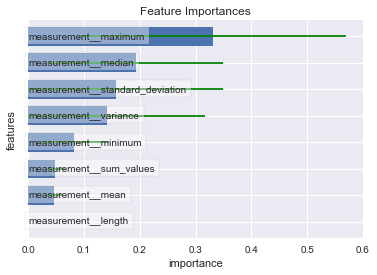

In [231]:
def plot_importances(cl, column_names, n_features=10, ax=None, error_bars = True):
    df_imp = pd.DataFrame({'features': column_names,
                           'importances': cl.feature_importances_})
    errors = np.std([tree.feature_importances_ for tree in cl.estimators_], axis=0)
    df_imp_sub = df_imp.set_index('features').sort_values('importances').tail(n_features)
    if error_bars:
        df_errors = pd.DataFrame({'features': column_names,
                                  'importances': errors})
        df_err_sub = df_errors.set_index('features').ix[df_imp_sub.index]
    else:
        df_err_sub = None
    ax = df_imp_sub.plot(kind='barh', width=.7, legend=False, ax=ax, xerr=df_err_sub, ecolor='g')
    for i,t in enumerate(df_imp_sub.index.tolist()):
        t = ax.text(0.001, i-.06,t)
        t.set_bbox(dict(facecolor='white', alpha=0.4, edgecolor='grey'))
    ax.yaxis.set_major_formatter(plt.NullFormatter())
    ax.set_title('Feature Importances')
    ax.set_xlim(0.0)
    ax.set_xlabel('importance')
    return df_imp_sub

plot_importances(cl, X_train.columns)

## Export Data

In [236]:
import os
output_dir = 'automl_service/data'
data_train.to_json(os.path.join(output_dir, 'data_train.json'))
data_test.to_json(os.path.join(output_dir, 'data_test.json'))
label_train.to_json(os.path.join(output_dir, 'label_train.json'))
label_test.to_json(os.path.join(output_dir, 'label_test.json'))

# Get Model Results

In [278]:
# models tried and model results
tpot.evaluated_individuals_

# number of models
len(tpot.evaluated_individuals_)

226

## See how different models performed

In [269]:
def get_model_results(evaluated_individuals):
    """For processing model run results, store results as dictionary of AUCS"""
    tpot_results = []
    for i,(k, (steps, auc)) in enumerate(evaluated_individuals.iteritems()):
        model_type = k.split('(')[0]
        tpot_results.append([model_type, i, auc])
    return tpot_results
automl_results = get_model_results(tpot.evaluated_individuals_)
automl_results = pd.DataFrame(automl_results, columns=['model', 'id', 'auc']).sort_values('model')

In [277]:
automl_results.groupby('model').count()

,id,auc
model,,
BernoulliNB,9,9
DecisionTreeClassifier,5,5
ExtraTreesClassifier,109,109
GaussianNB,13,13
GradientBoostingClassifier,1,1
KNeighborsClassifier,23,23
LinearSVC,15,15
LogisticRegression,25,25
MultinomialNB,5,5


## Build BoxPlot

(0.8, 0.90000000000000002)

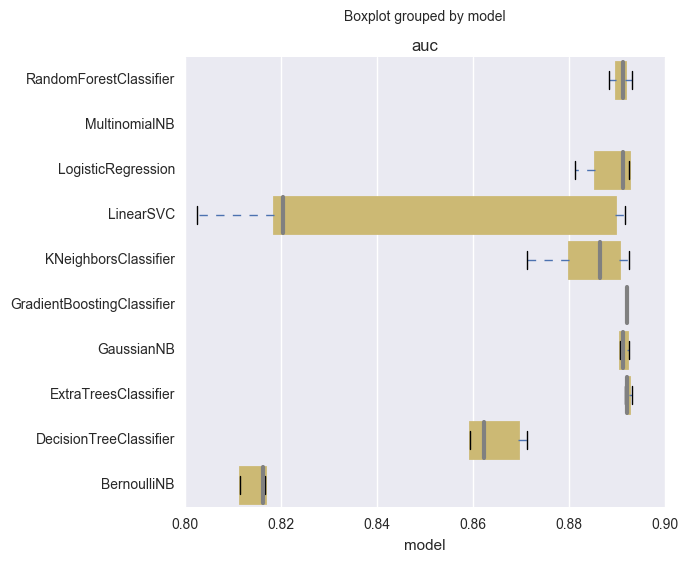

In [279]:
import seaborn
sns.set_style(style='darkgrid')
f, ax = plt.subplots(figsize=(6,6))
box = automl_results.boxplot(column='auc', by='model', rot=0, vert=False,
                             ax=ax, patch_artist=True, return_type='dict',
                             widths=0.8)
ax.grid(axis='y')

for b in box['auc']['boxes']:
    color = sns.color_palette()[4] 
    b.set(color=color, linewidth=2)
    b.set(facecolor=color, linewidth=2)

# for median in bp['medians']:
for median in box['auc']['medians']:
    median.set(color='grey', linewidth=3)

plt.xlim(0.8)

TypeError: 'AxesSubplot' object has no attribute '__getitem__'

In [150]:
pd.DataFrame(model_types)

ValueError: arrays must all be same length

# Test API 

## Train Model

In [246]:
!ls 

ls: data: No such file or directory


In [245]:
import os
import requests
base_url = "http://0.0.0.0:8080"
train_url = os.path.join(base_url, 'train_model')
serve_url = os.path.join(base_url, 'serve_pred')

train_files =  files = {'raw_data': ('data/train_data', open('report.xls', 'rb'),
                        'application/vnd.ms-excel', {'Expires': '0'})}
requests.post(train_url)